# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coxen hole
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | al jawf
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | coyhaique
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | bahia de kino
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | trondheim
Processing Record 21 of Set 1 | a

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data,
                            columns=["City",
                                     "Lat",
                                     "Lng",
                                     "Max Temp",
                                     "Humidity",
                                     "Cloudiness",
                                     "Wind Speed",
                                     "Country",
                                     "Date"
                            ])

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coxen hole,16.3244,-86.5366,30.60,62,0,4.12,HN,1690413068
1,fortuna,40.5982,-124.1573,22.18,67,0,6.17,US,1690413068
2,al jawf,29.5000,38.7500,29.82,19,8,3.52,SA,1690413068
3,ilulissat,69.2167,-51.1000,13.01,50,0,4.12,GL,1690412878
4,coyhaique,-45.5752,-72.0662,-0.03,93,100,1.54,CL,1690413068


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data, cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data, cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coxen hole,16.3244,-86.5366,30.60,62,0,4.12,HN,1690413068
1,fortuna,40.5982,-124.1573,22.18,67,0,6.17,US,1690413068
2,al jawf,29.5000,38.7500,29.82,19,8,3.52,SA,1690413068
3,ilulissat,69.2167,-51.1000,13.01,50,0,4.12,GL,1690412878
4,coyhaique,-45.5752,-72.0662,-0.03,93,100,1.54,CL,1690413068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

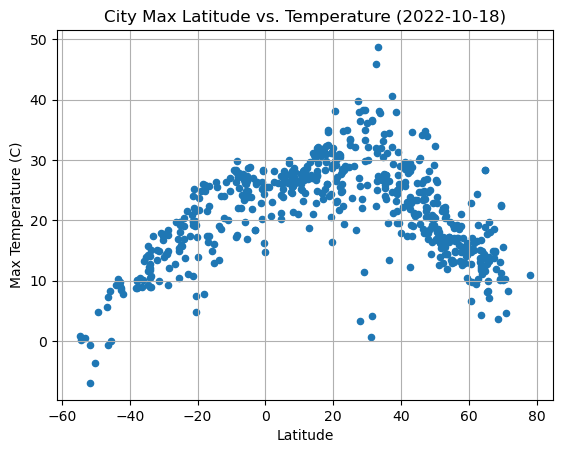

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp",title="City Max Latitude vs. Temperature (2022-10-18)", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data,Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

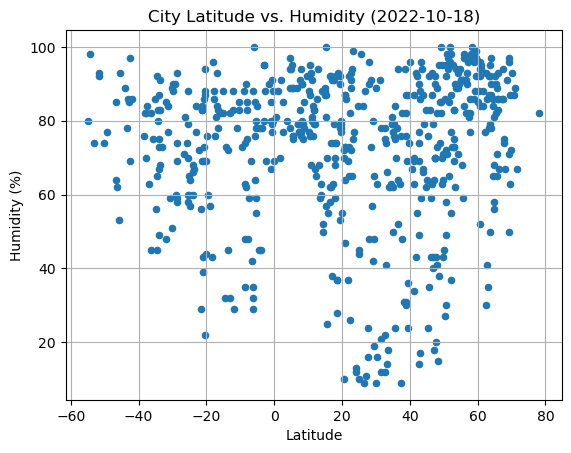

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity",title="City Latitude vs. Humidity (2022-10-18)", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data, Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

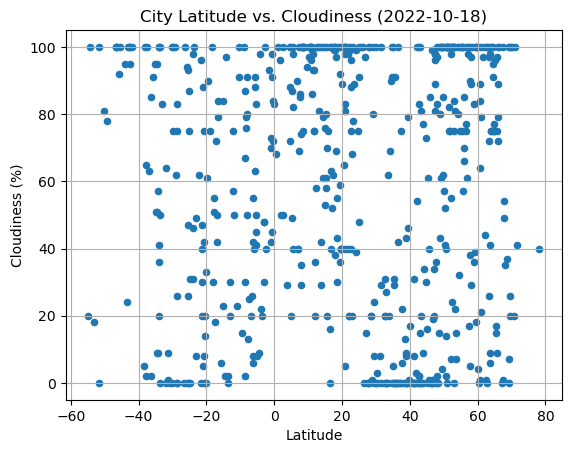

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness",title="City Latitude vs. Cloudiness (2022-10-18)", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data, Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

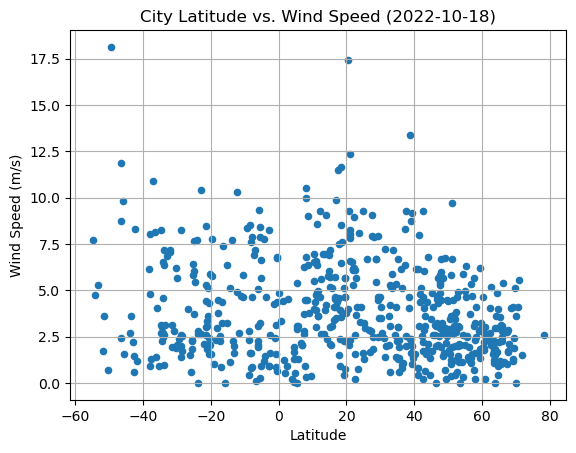

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed",title="City Latitude vs. Wind Speed (2022-10-18)", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data, Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"] < 0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coxen hole,16.3244,-86.5366,30.60,62,0,4.12,HN,1690413068
1,fortuna,40.5982,-124.1573,22.18,67,0,6.17,US,1690413068
2,al jawf,29.5000,38.7500,29.82,19,8,3.52,SA,1690413068
3,ilulissat,69.2167,-51.1000,13.01,50,0,4.12,GL,1690412878
5,ust-nera,64.5667,143.2000,13.74,65,91,2.98,RU,1690413068


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"] >= 0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,coyhaique,-45.5752,-72.0662,-0.03,93,100,1.54,CL,1690413068
9,waitangi,-43.9535,-176.5597,9.34,89,95,2.68,NZ,1690412925
10,puerto natales,-51.7236,-72.4875,-0.74,92,100,1.75,CL,1690413069
13,grytviken,-54.2811,-36.5092,0.11,98,100,4.74,GS,1690413069
14,west island,-12.1568,96.8225,23.99,88,75,10.29,CC,1690413069


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6255431514694583


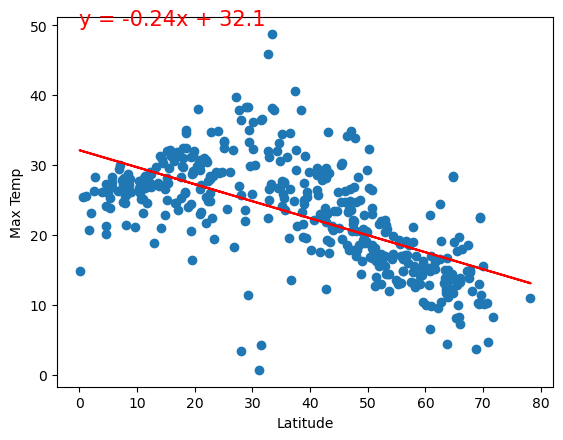

In [15]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter("Lat", "Max Temp")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
north_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(north_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.8507628461515421


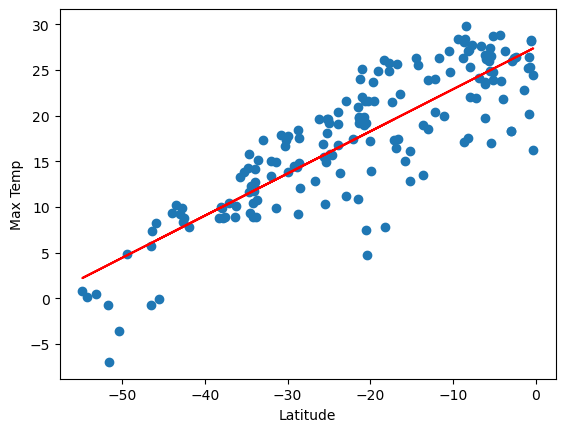

In [16]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter("Lat", "Max Temp")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
south_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(south_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere data has a neagtive corelations showing the higher the Latitude number the lower the Max Temperature will be. For the Southern Hemisphere data is showing a positive corelation, the closer to the equator or 0 Latitude the higher the Max Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09451245373073916


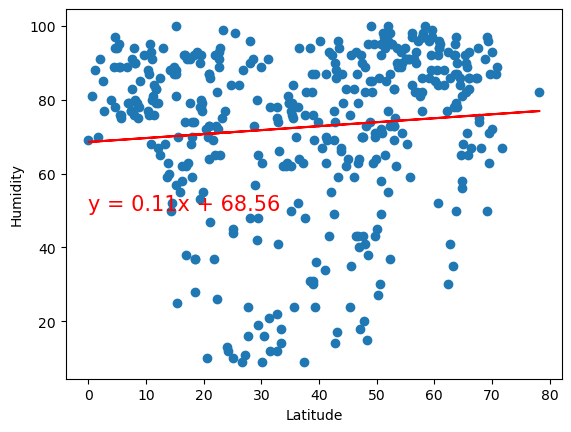

In [17]:
# Northern Hemisphere
northern_hemi_df.plot.scatter("Lat", "Humidity")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
north_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(north_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.12071182000976383


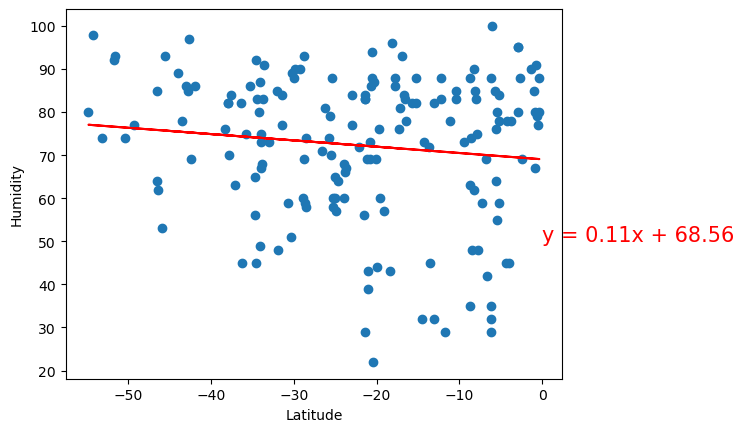

In [18]:
# Southern Hemisphere
# Northern Hemisphere
southern_hemi_df.plot.scatter("Lat", "Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
south_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(north_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere data has a positive corelations, albeit a small corelation showing the higher the Latitude number the higher the Humidity will be. For the Southern Hemisphere data is showing a negative corelation, the closer to the equator or 0 Latitude the lower the Humidity. Both have weak correlations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10730688473381864


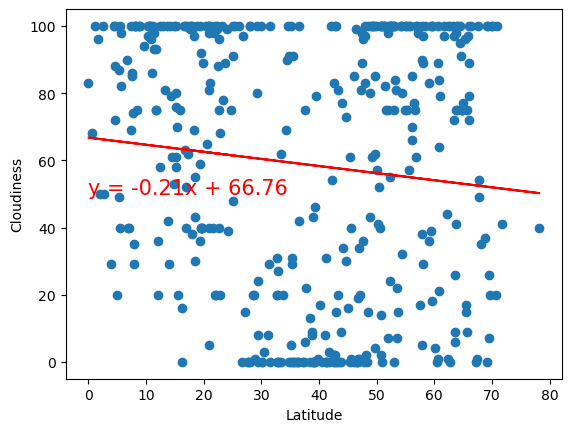

In [19]:
# Northern Hemisphere
northern_hemi_df.plot.scatter("Lat", "Cloudiness")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
north_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(north_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.12033266121616823


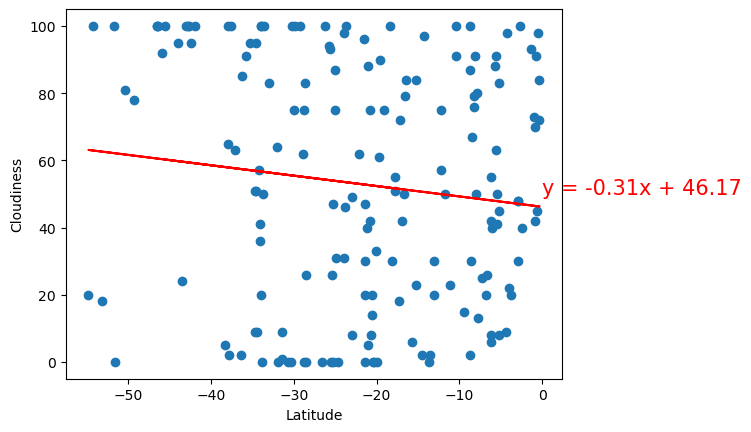

In [20]:
# Southern Hemisphere
southern_hemi_df.plot.scatter("Lat", "Cloudiness")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
south_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(south_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere data has a neagtive corelations showing the higher the Latitude number the lower the Cloudiness will be. The Southern Hemisphere data has a neagtive corelations showing the lower the Latitude number the lower the Cloudiness will be. Both have weak correlations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.29955233069334686


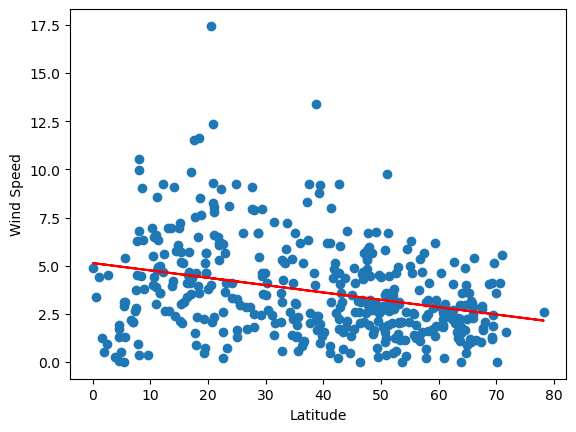

In [21]:
# Northern Hemisphere
northern_hemi_df.plot.scatter("Lat", "Wind Speed")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
north_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(north_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.11831355678329449


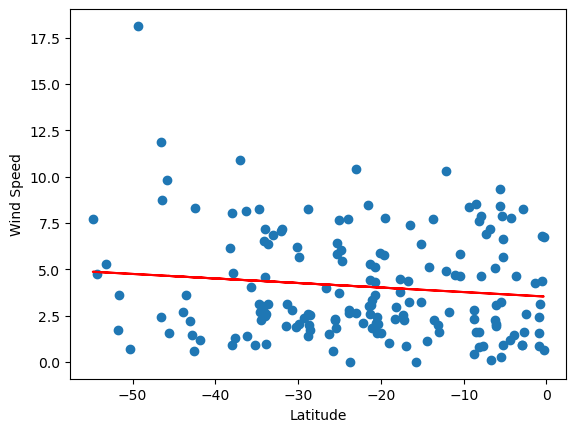

In [22]:
# Southern Hemisphere
southern_hemi_df.plot.scatter("Lat", "Wind Speed")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
south_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(south_line,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE The Northern Hemisphere data has a neagtive corelations showing the higher the Latitude number the lower the Wind Speed will be. The Southern Hemisphere data has a neagtive corelations showing the lower the Latitude number the lower the Wind Speed will be. Both have weak correlations.